In [1]:
import numpy as np
import os 
import sys
import matplotlib.pyplot as plt
from matplotlib import colors


In [2]:
img1 = np.load("/Users/gijsdepooter/Desktop/UROP/RFArrays/B_80,0_0,0.npy","r")


In [3]:
FileStats = os.stat("/Users/gijsdepooter/Desktop/UROP/RFArrays/B_80,0_0,0.npy")
print('Size of file is', FileStats.st_size,'bytes')

Size of file is 65664 bytes


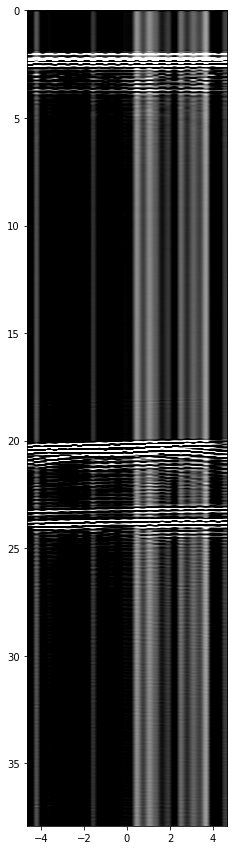

In [4]:
plt.rcParams["figure.figsize"] = [5,15]
plt.imshow(img1, cmap='gray', extent=[-4.65, 4.65, 37.9, 0 ],norm=colors.NoNorm())

In [12]:
conda install opencv

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Examining conflict for numba pytest mock pytables astropy:   1%| | 5/374 [01:3/\ ^C
                                                                               failed

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install opencv-python

     |████████████████████████████████| 46.4 MB 32.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
import cv2
from PIL import Image, ImageFilter



In [17]:
dft = cv2.dft(np.float32(img1),flags = cv2.DFT_COMPLEX_OUTPUT)

In [18]:
dft_shift = np.fft.fftshift(dft)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f7d12308040>)

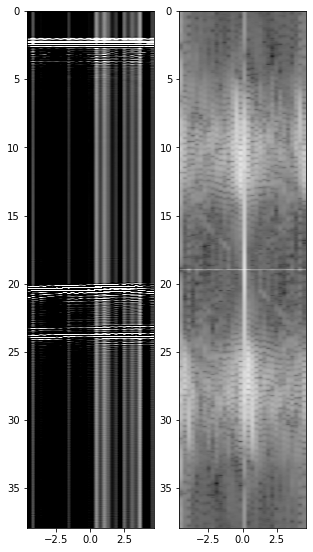

In [27]:
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
# plot both images
plt.figure(figsize=(5,15))
plt.subplot(121),plt.imshow(img1,extent=[-4.65, 4.65, 37.9, 0 ], cmap = 'gray', norm=colors.NoNorm())
plt.subplot(122),plt.imshow(magnitude_spectrum,extent=[-4.65, 4.65, 37.9, 0 ], cmap = 'gray')

In [24]:
rows, cols = img1.shape
crow,ccol = rows//2 , cols//2

In [61]:
mask = np.ones((rows, cols, 2), np.uint8)
r=5
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r
mask[mask_area] = 0

# apply filter
fshift = dft_shift * mask

# return to spatial domain
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f7d132172b0>)

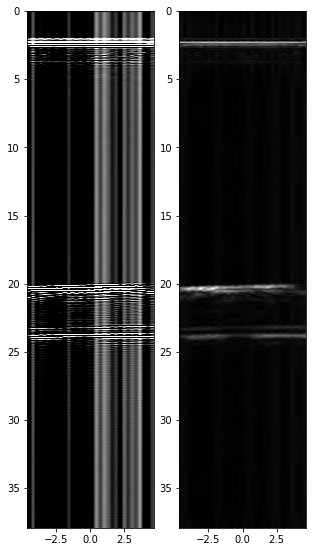

In [62]:
plt.subplot(121),plt.imshow(img1,extent=[-4.65, 4.65, 37.9, 0 ], cmap = 'gray', norm=colors.NoNorm())
plt.subplot(122),plt.imshow(img_back,extent=[-4.65, 4.65, 37.9, 0 ], cmap = 'gray')

In [80]:
from scipy.signal import hilbert, chirp


In [88]:
env = hilbert(np.float32(img1))

In [84]:
amplitude_envelope = np.abs(env)

In [89]:
print(amplitude_envelope)

[[108.67675754  70.66317112  83.21004323 ... 158.26347041 184.46929487
   57.51370207]
 [ 67.90322568  35.5202527   95.76307824 ... 204.21708674  50.30164956
   94.60701587]
 [ 99.54249994  80.66589239 113.41983343 ... 194.42974054  83.84614469
  105.31551889]
 ...
 [ 69.81655989  81.76002319  97.24138159 ... 197.54599065  56.56983357
  106.88757524]
 [ 68.53895577  82.21157704  95.70851291 ... 200.88287035  55.59633884
  104.35529753]
 [ 70.29979666  82.79586697  97.01914175 ... 192.06229031  57.38164318
  105.6966182 ]]


In [116]:
intensity=np.mean(amplitude_envelope, axis=1)
print(intensity)

[83.15633506 88.1449053  84.18034958 ... 83.92824239 85.45310719
 84.96465444]


In [104]:
depth=np.arange(0,37.863,0.037)
print(len(depth))

1024


In [108]:
from sklearn import preprocessing

In [131]:
normalized_int = preprocessing.normalize([intensity])
print(normalized_int)
norm_int=np.reshape(normalized_int,1024)
norm_int_lg = np.log(norm_int)



[[0.01232276 0.013062   0.0124745  ... 0.01243714 0.01266311 0.01259073]]


Text(0, 0.5, 'Normalised Intensity')

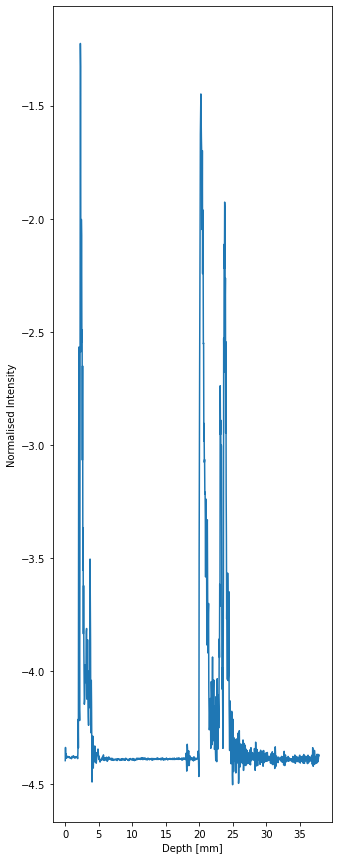

In [132]:
plt.plot(depth,norm_int_lg)
plt.xlabel("Depth [mm]")
plt.ylabel("Normalised Intensity")